# Lesson 16 深度视觉入门（上）

## 1. 从卷积到卷积神经网络
### 1.1 图像的基本表示

深度视觉是处理图像的学科，因此我们需要从图像本身开始说起。来看这张孔雀图像。

![Alt text](image-66.png)

img.shape

(1707, 2560, 3)

在之前的课程中，我为大家大家展示过图像数据在计算机中的基本结构。首先，每张图像都是以一个三维Tensor或者三维矩阵表示，其三个维度分别是高度（Height）,宽度（Width）,通道（Channels）。

高度和宽度往往排列在一起，一般是先高后宽的顺序，两者共同决定图像的尺寸大小。如上图，高度1707则说明图像在竖直方向上有1707个像素点（有1707列），同理宽度则代表水平方向的像素点数目（有2560行），因此如上的孔雀图总共有1707*2560=4,369,920个像素点。

通道是单独的维度，通常排在高度宽度之后，但也有可能是排在第一位。它决定图像中的轮廓，线条，色彩，基本决定了图像中显示的所有内容，尤其是颜色，因此又叫做色彩空间（color space）。

怎么理解通道呢？你可能在很年幼的时候就学过一些基本的色彩知识，例如，自然界中的颜色都是由“三原色”红黄蓝构成的，将红色和蓝色混合在一起就会得到紫色，将红色和黄色混合在一起就会得到橙色，白色的阳光可以经由三棱镜分解成七彩的光谱等等。计算机的世界中的颜色也是由基本颜色构成的，在计算机的世界中，用于构成其他颜色的基础色彩，就叫做通道。

我们最常用的三种基本颜色就是红绿蓝（Red, Green, Blue,简写为 RGB ），所以最常用的就是RGB通道。我们通过将红绿蓝混合在一起，创造丰富的色彩。例如，上面的孔雀图，其实就是下面三张红，绿，蓝三色的图像叠加而成。

![Alt text](image-67.png)

不难注意到，通道就是和原图尺寸一致，像素点数量一致的，只能够显示其通道颜色的图像。例如，红色通道就只能显示红色，绿色通道就只能显示绿色，蓝色同理。

![Alt text](image-68.png)

在通道的每一个像素点上，都有[0, 255]之间的整数值，这些整数值代表了“该通道上颜色的灰度”。在图像的语言中，“灰度”就是明亮程度，越接近通道本身的颜色，数字越接近0,就代表颜色的明亮程度越弱，也就是越接近黑色。（仔细观察孔雀脖子的部分，孔雀脖子在图像上是蓝色的，这种蓝色主要由蓝色通道和绿色通道构成，几乎没有任何红色通道元素，因此在红色通道的图片中，孔雀脖子几乎是黑的。）

![Alt text](image-69.png)

在图像的矩阵中，我们可以在使用索引找出任意像素的三个通道上的颜色的明度，例如，对于在第0行，第0列的样本而言，可以看到一个三列的矩阵，这三列就分别代表这红色，绿色，蓝色的像素值。当三个值都不为0时，这个像素在三个通道上都有颜色。相对应的，最纯的红色会显示为（255,0,0），最纯的蓝色就会显示为（0,0,255），绿色可以类推。当像素值为（0,0,0）时，这个像素点就会变为黑色，当像素值为（255,255,255），像素点就为白色。通道上像素的灰度，也就是矩阵中的值几乎100%决定了图像会呈现出什么样子。

![Alt text](image-70.png)

在图像的世界中有许多“通道”类型，就和计算机世界有许多编码类型一样，较为常见的通道有以下几种：

**灰度通道** : 灰度在计算机视觉中是指“明暗程度”，而不是指“灰色”，因而灰度通道也不是指图像是灰色的通道，而是只有一种颜色的通道，同理，灰度图像是只有一个通道的图像。所以RGB通道中的任意一个通道单独拿出来之后，都可以用灰度（明暗）来显示。就是我们在Fashin-MINIST数据集中所见到的，灰度图像的shape最后一列为1,索引出来的值中只有一个数字，这个数字就是这种为一颜色的明度。当你看见图像的通道数为1时，无论可视化之后图像显示什么视觉颜色，它都只是表示单一颜色的明度而已。（没有人怀疑过为什么fashion-MINIST中的图绘制出来都是蓝绿色的吗？你现在了解，其实蓝绿色也只是明度的一种表示）。

![Alt text](image-71.png)

**RGB 色彩空间**：数字世界中最常见的彩色通道，分别表示红，绿，蓝三种电子成像的基本颜色。

**CMYK色彩空间**：用于彩色打印机成像的通道，由青色（Cyan）,品红（Magenta）,黄色（Yellow）和黑色（Black）构成，因此是四维通道，在图像结构中会显示为（高度，宽度，4）。

**HSV（或HSL）色彩空间**：HSV通道是为人们描述和解释颜色而创建的，H代表色相，S代表饱和度，V代表亮度。

以上三种空间可以自由切换（会产生数据损失），在OpenCV中也有支持切换的函数可以调用。在计算机视觉中，我们可能遇见各种通道类型的图片，当我们需要对图像进行特定操作时，我们必须了解这些通道并了解如何在他们之间进行切换。

![Alt text](image-72.png)

另一种非常常见的色彩空间时RGBA，它也拥有四维通道，分别是（红色，绿色，蓝色，透明度alpha）。透明度alpha的取值范围在0-1之间。当一个像素的RGB显示为（0,255,0）时，则说明这个像素里时透明度最高的绿色，但加上透明度后，色彩就会变得“透明”。RGBA可以提供更丰富的色彩样式，让图像的色彩变得更加绚丽。

![Alt text](image-73.png)

### 1.2 OpenCV令像素变化来改变图像

一张图像显示什么内容是由通道中的像素值决定的，只要能够操作像素，就能够改变图像，这是图像能够被“处理”的基本条件。在这一节，我们就使用OpenCV来对图像进行一些改变。首先，先导入一张自己的图像来看看，大家可以根据自己的喜好导入相应的图像。

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# 读取图片
img = cv.imread('/media/liu/HP USB321FD/DL学习/Python工具包学习/Nerual_network_train/image-66.png')

# OpenCV默认读取图片的格式是BGR，而Matplotlib是RGB，所以需要转换一下
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# 也可以使用步长为-1的逆序索引来进行转换
# img = img[:, :, ::-1] 

In [4]:
img

array([[[ 53,  57,  63],
        [ 52,  56,  62],
        [ 53,  57,  63],
        ...,
        [ 55,  56,  60],
        [ 55,  55,  60],
        [ 55,  56,  61]],

       [[ 53,  57,  63],
        [ 53,  57,  63],
        [ 53,  57,  63],
        ...,
        [ 56,  55,  60],
        [ 57,  56,  61],
        [ 56,  56,  60]],

       [[106, 110, 116],
        [105, 109, 115],
        [105, 109, 115],
        ...,
        [104, 103, 108],
        [104, 104, 109],
        [105, 104, 109]],

       ...,

       [[252, 254, 255],
        [252, 254, 255],
        [252, 254, 255],
        ...,
        [253, 254, 255],
        [254, 254, 255],
        [254, 254, 254]],

       [[252, 254, 255],
        [252, 254, 255],
        [252, 254, 255],
        ...,
        [253, 254, 255],
        [253, 254, 255],
        [254, 254, 254]],

       [[252, 254, 255],
        [252, 254, 255],
        [252, 254, 255],
        ...,
        [251, 253, 255],
        [252, 254, 254],
        [253, 254, 254]]

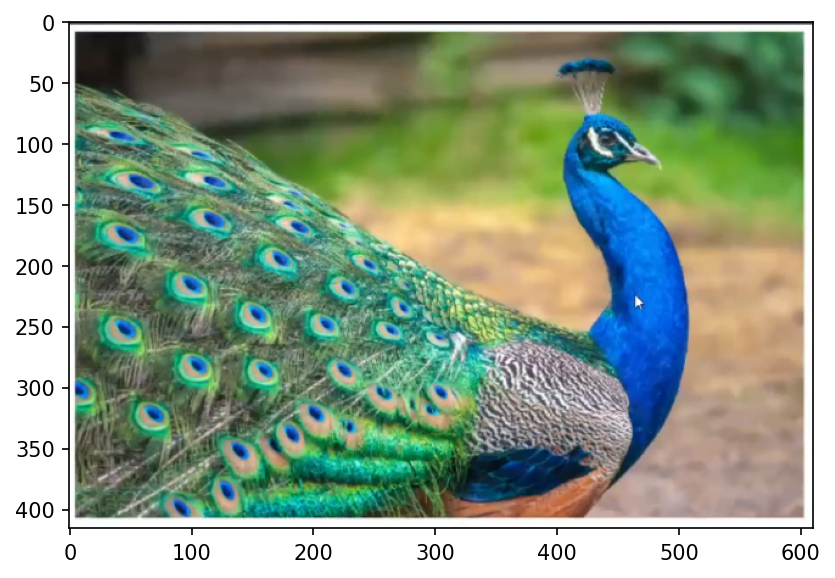

In [6]:
# 显示图片
plt.figure(dpi=150) # 画布，dpi是分辨率
plt.imshow(img) # 显示图片

In [7]:
img.dtype # 查看图片的数据类型

dtype('uint8')

In [8]:
a = np.array([0, 1, 255], dtype=np.uint8) # 创建一个uint8类型的数组
a

array([  0,   1, 255], dtype=uint8)

In [9]:
a + 10

array([10, 11,  9], dtype=uint8)

In [10]:
a - 10

array([246, 247, 245], dtype=uint8)

In [11]:
# 图像像素归一化
img = img / 255
img

array([[[0.20784314, 0.22352941, 0.24705882],
        [0.20392157, 0.21960784, 0.24313725],
        [0.20784314, 0.22352941, 0.24705882],
        ...,
        [0.21568627, 0.21960784, 0.23529412],
        [0.21568627, 0.21568627, 0.23529412],
        [0.21568627, 0.21960784, 0.23921569]],

       [[0.20784314, 0.22352941, 0.24705882],
        [0.20784314, 0.22352941, 0.24705882],
        [0.20784314, 0.22352941, 0.24705882],
        ...,
        [0.21960784, 0.21568627, 0.23529412],
        [0.22352941, 0.21960784, 0.23921569],
        [0.21960784, 0.21960784, 0.23529412]],

       [[0.41568627, 0.43137255, 0.45490196],
        [0.41176471, 0.42745098, 0.45098039],
        [0.41176471, 0.42745098, 0.45098039],
        ...,
        [0.40784314, 0.40392157, 0.42352941],
        [0.40784314, 0.40784314, 0.42745098],
        [0.41176471, 0.40784314, 0.42745098]],

       ...,

       [[0.98823529, 0.99607843, 1.        ],
        [0.98823529, 0.99607843, 1.        ],
        [0.98823529, 0

归一化后，处理图像数据更加快

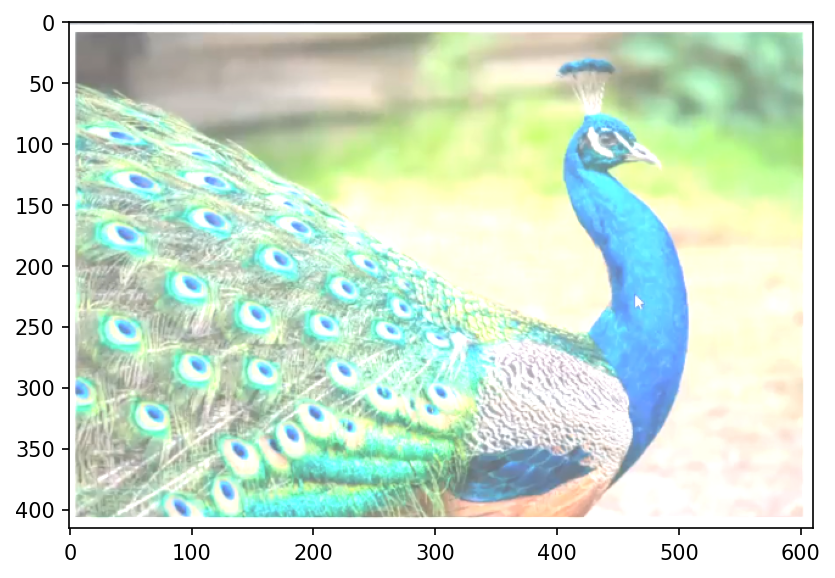

In [12]:
# 调亮图片
img = np.clip(img + 100/255, 0, 1)
plt.figure(dpi=150)
plt.imshow(img)


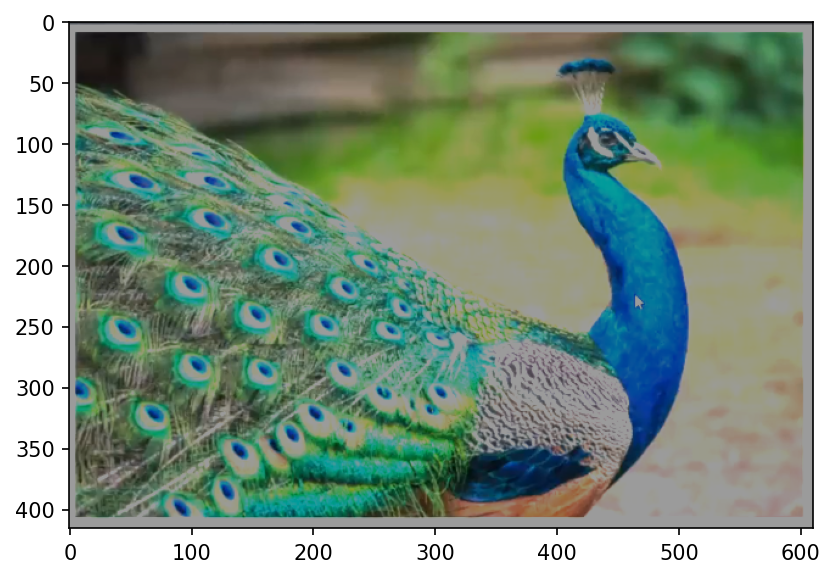

In [13]:
# 调暗图片
img = np.clip(img - 100/255, 0, 1)
plt.figure(dpi=150)
plt.imshow(img)

值得注意的是，由于灰度的存在，图像是可以被表示成二元函数的，通常写作 $ f(x, y) $ 或 $f(i, j)$。在这个函数中，函数的两个自变量是图像的宽度与高度，函数值就是该通道上的灰度。

![Alt text](image-74.png)

是不是看起来和梯度下降中梯度的图像有些类似呢？由于图像可以被作为二元函数表示，调整亮度等操作也可以用数学的方式来表示：

![Alt text](image-75.png)

其中,$g(i, j)$表示输出图像，$f(i, j)$表示输入图像，$\alpha$控制对比度，$\beta$控制亮度。这就是视觉领域最简单的线性变换。

有了函数，我们自然也可以对图像的函数进行求导，积分等操作。这种表示大大拓宽了我们可以在图像上进行的操作，只要我们控制像素值的范围在[0, 255],我们就可以在图像上进行任意的数学变换。计算机视觉研究如何让计算机从图像或图像序列中获取信息并理解其信息，其主要目的在于从图像或图像序列中提取对世界的描述。什么样的图像信息，才有利于对世界进行描述呢？在人们探索这个问题的时候，发现了一个很有趣并且有用的数学变化，下一节我们来谈谈这种对于整个计算机视觉领域影响深远的数学变化。

### 1.3 卷积操作

这里由两个长度为9的列表，我们让对应位置的元素相乘，之后再相加：

![Alt text](image-76.png)

$ a*9 + b*8 + 7*c + 6*d + 5*e + 4*f + 3*g + 2*h + i$

如果我们把数字列表看作是权重，那以上式子就可以被看作是一个加权求和的过程，现在，我们将九个数字整理成如下的矩阵：

![Alt text](image-77.png)

左侧的矩阵我们称之为字母矩阵，而右侧的矩阵则称之为数字矩阵（也就是权重矩阵）。当表示成矩阵之后，我们可以求解两个矩阵的点积，也就是将相对应位置的元素相乘再相加得到一个标量，这与我们刚才实现的加权求和运算本质一致。但此时我们发现，在变成矩阵之前，a对应的是9,i对应的是1,而现在a对于的是1,i对应的是9.如果我们还想实现刚才的加权求和，就需要将数字举证在平面上顺时针旋转180度，得到旋转矩阵：

![Alt text](image-78.png)

现在，将旋转矩阵与字母矩阵求点积，就可以得到与之前的加权求和一样的结果了。

卷积操作是一种常见的数学计算，二维矩阵的卷积表示其中一个矩阵在平面上旋转180度后，与另一个矩阵求点积的结果。其中“卷”就是旋转，“积”就是点积，也就是加权求和。本质上来说，卷积就是其中一个矩阵旋转190度后，两个矩阵对应位置元素相乘再加和的结果。这个过程可以使用数学公式表示：

![Alt text](image-79.png)

其中x表示其中一个矩阵的值，y表示另一个矩阵的值，m与n分别是两个矩阵的行数和列数。再其他教材或其他说明中，你可能会见到使用其他符号的二维矩阵的卷积表示，但其本质都与我们所说的“旋转再求内积”一致。你也可能会见到卷积的代数表示（就是带积分的那个），甚至是离散卷积的表示形式，幸运的是那些与矩阵卷积有所不同，因此如果你感觉困惑，你可以不用去理会。

之前我们说过，只要我们对图像数据进行任何数学运算，且得出的结果不超出图像的像素范围[0, 255],就可以生成新的图像。而卷积是一种从两个矩阵中得出新数值的方式，这个操作正好可以用于图像的变换。但图像的矩阵里动辄就几百万甚至几千万个像素，如何将卷积适用于图片来得到一张新的图片（也就是一个新的矩阵）呢？来看一个典型的操作：

假设现在的权重矩阵如下：

![Alt text](image-80.png)

我们让它与下图中左侧的图像进行卷积。左侧的图像是一个6*6结构的图像，其左半边的像素都为10,右半边像素都为0的图像，因此看起来，它右侧那一半是均匀的颜色，左侧那半边是另一种均匀的颜色，因此中间竖线就是两块均匀颜色的“边缘”。为了实现卷积，我们将权重矩阵进行了180度的旋转，图中所述的是旋转矩阵。

![Alt text](image-81.png)

对于这张图像，卷积操作是这样进行的。首先我们令旋转矩阵与绿色区域进行点积（对应位置元素相乘再相加），得到卷积结果0,成为新矩阵的第一个元素。

![Alt text](image-82.png)

接下来，我们再图片上，将绿色趋于向右移动一个像素，再令旋转矩阵与绿色区域进行点积，得到卷积结果40.

![Alt text](image-84.png)

同样的，我们继续移动绿色区域，继续计算点积：

![Alt text](image-83.png)



![Alt text](image-85.png)

当横向区域扫描完毕之后，我们向下移动一个像素，继续从左向右扫描：

![Alt text](image-86.png)

![Alt text](image-87.png)

以此类推，一直到绿色区域扫描万整张图像，得到右侧矩阵：

![Alt text](image-88.png)

此时，右侧的矩阵就是我们在左图上使用权重矩阵进行卷积计算的结果。我们得到了一张4*4尺寸的图像。原本的图像在中间有一条明显的“边界”，现在我们权重矩阵对这张图像进行卷积后得出的图“放大了”这个边界，让边界亮了起来，让其他地方变暗了，这就实现了对图像进行“边缘检测”。当然，由于我们现在使用的图像非常小（像素只有6*6），所以得到的边缘检测结果看起来边缘非常粗，实际上在真实案例中，白色的线会非常细。

边缘检测是卷积操作的一个非常常见应用，我们所使用的权重矩阵其实就是纵向的索贝尔算子（Sobel Operator）,用于检测纵向的边缘，我们也可以使用横向的索贝尔算子，以及拉普拉斯算子来检测边缘。在OpenCV当中我们可以很容易地实现这个操作：

![Alt text](image-89.png)

(-0.5, 498.5, 417.5, -0.5)

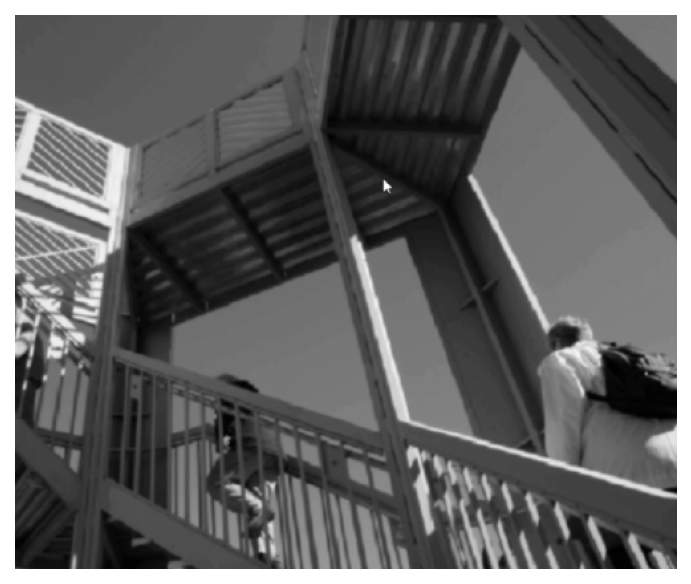

In [14]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('/media/liu/HP USB321FD/DL学习/Python工具包学习/Nerual_network_train/image-89.png', 0)

# 查看原图
plt.figure(dpi=150)
plt.imshow(img, cmap='gray')
plt.axis('off')

In [15]:
# 两种经典算子，拉普拉斯算子和索贝尔算子
laplacian = cv.Laplacian(img, cv.CV_64F, ksize=5)

# cv2.CV_64F是opencv中常常使用的一种数据格式
# 在这里输入之后可以保证输出数据是unit8类型的
sobelx = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=5) # 横向的sobel算子，旋转矩阵为5*5
sobely = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=5) # 纵向的sobel算子，旋转矩阵为5*5



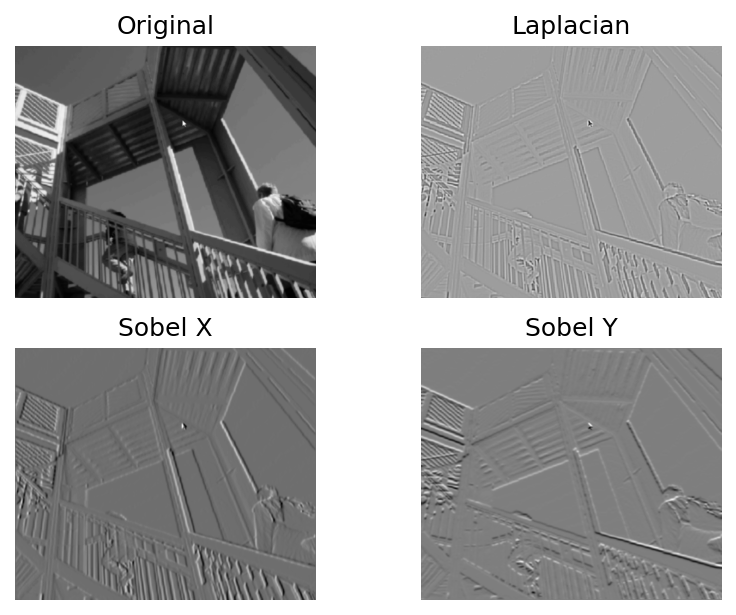

In [16]:
plt.figure(dpi=150)
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian')
plt.axis('off')
plt.subplot(2, 2, 3)
plt.imshow(sobelx, cmap='gray')
plt.title('Sobel X')
plt.axis('off')
plt.subplot(2, 2, 4)
plt.imshow(sobely, cmap='gray')
plt.title('Sobel Y')
plt.axis('off')
plt.show()


除了边缘检测之外，我们还可以使用其他权重矩阵与原图卷积来修改图像，例如锐化/模糊等等。

![Alt text](image-90.png)

在这些例子中，有一个值得注意的问题：我们首先确立权重矩阵，然后将矩阵旋转180度之后再与感受野进行点积，这个过程就叫做“卷积”，但在实际执行计算的时候，真正发挥作用的是旋转后的旋转矩阵。为什么我们不直接定义旋转矩阵，而要先定义一个权重矩阵，再旋转它呢？

![Alt text](image-91.png)

事实上，就连OpenCV中的sobel和Laplacian函数都没有进行“旋转”，而是直接定义了旋转后的矩阵。或许是最初的研究者尝试了“卷积操作”，就这样流传了下来，或许是原始初始权重的逻辑可能来源于某些理论，不旋转将会使边缘检测失效，但在今天的计算机视觉技术中，尤其是深度学习中，大部分时候我们都不再进行“旋转”这个步骤了。甚至在许多卷积相关的讲解，会直接忽略旋转这个步骤，导致许多人无法理解“卷积”的“卷”从何而来。

![Alt text](image-92.png)

没有旋转，我们也无需在关心最初的矩阵。现在我们只关心与图像相乘的旋转矩阵，我们把旋转矩阵的值称为权重，将该矩阵称为过滤器（filter, 意为可以过滤出有效的特征），也被叫做卷积核(Convolution Kernel)，每个卷积核在原图上扫描的区域（被被标注为绿色的区域）被称为感受野（receiptive field）,卷积核与感受野轮流点积得到的新矩阵被叫做特征图（feature map）或激活图（activation map）。当没有旋转，只有点积的时候，图像与矩阵之间的运算就不是数学上的“卷积”，而是“互相关”了，但是基于历史的原因和行业习惯，我们依然把整个过程称为“卷积操作”，这个名字沿用到今天，也影响了深度学习中对卷积神经网络的称呼。

### 1.4 卷积遇见深度学习

检测边缘，锐化，模糊，图像降噪等卷积相关的操作，在图像处理中都可以被认为谁在从图像中提取部分信息，因此这部分图像处理技术也被叫做“特征提取技术”。卷积操作后所产生的图像可以作为特征被输入到分类算法中，在传统的计算机视觉领域，这一操作常常被认为可以提升模型表现并增强计算机对图像的识别能力。计算机视觉是研究任何让计算机从图像或图像序列中获取信息并理解其信息的学科，理解就意味着识别，判断甚至是推断，因此识别在计算机视觉中是非常核心的需求，卷积操作在传统计算机视觉中的地位就不言而喻了。数十年来，计算机视觉工程师们使用前人的经验与研究不断提取特征，再送入机器学习算法中进行识别和分类。然而，这样做是有极限的。

在边缘检测的例子中，我们看到拉普拉斯和所贝尔算子的检测是很明显的。但是，如果使用我们之前导入的孔雀图像，就会发现边缘检测的效果有些糟糕。

为什么会这样呢？这是因为，sobel和拉普拉斯算子对边缘抓去程度较轻（从图像处理的原理上来看，他们只求取了图像上的一维导数，因此效果不够强），这样的抓取对于横平竖直的边缘，以及色彩差异较大的边缘有较好的效果，对于孔雀这样色彩丰富，线条和细节非常多的图像，这两种算子就不太够用了。所以在各种边缘检测的例子中，如果你仔细观察原图，你就会发现原图都是轮廓明显的图像。

这说明，不同的图像必须使用不同的权重进行特征提取，同时，我们还必须加深特征提取的深度。那什么样的图像应该使用什么样的权重呢？如何才能够提取到更深的特征呢？同时，如果过去的研究中提出的算子都不奏效，应该怎么找到探索新权重的方案呢？即便有效地实现了边缘检测，锐化，模糊等操作，就能够提升最终分类算法的表现吗？其实不然。这些问题困扰计算机视觉工程师许久，即便在传统视觉中，我们已经提出了不少对于这些问题的解决方案，但从一劳永逸的方向来考虑，如果计算机自己能够知道该使用什么算子，自己知道应该提取到什么程度就好了。此时，深度学习登场了。

#### 1.4.1 通过学习寻找卷积核

![Alt text](image-93.png)

在深度神经网络中，层与层之间存在着连接上层与下层的权重系数$w$。深度学习的核心思想之一，就是给与算法训练目标，让算法自己朝着目标函数最小化的方向进行学习，并自动求解出权重系数$w$的最佳组合。在深度神经网络的DNN中，我们输入的是特征矩阵，让特征矩阵与权重系数相乘后，传入下一层下一层进行加和与激活，并通过从后向前的方式训练网络自己找出权重。在计算机视觉领域，我们输入的特征变成了一张张图像的一个个通道，我们让通道上的像素值与卷积核进行卷积操作后，得到输出下一层的图像（特征图 feature map）。而卷积操作本质就是感受野与卷积核点积，其操作与DNN中的权重与特征相乘非常相似。

顺着这样的思路，卷积层（Convolutional layer）诞生了，任意使用卷积层的神经网络就被称为是卷积神经网络（Convolution Neural Network），卷积网络一族有相当多的经典模型。每当卷积层被建立时，卷积和中的值就会被随机生成，输入图像的像素点与卷积核点积后，生成的特征图被输入到下一层网络，并最终变成预测标签放入损失函数中进行计算。在使用优化算法进行迭代，损失足够低后，卷积核中的权重值就被自动学习出来了，这就实现了“自动找出最佳权重，并提取出对分类最有利的特征”。

![Alt text](image-94.png)

这样学习出的卷积核的值以分类效果为最终目标，可以选择出最恰当的特征，因此理想状况下，可以完美避免人工进行特征提取的这个步骤。剩下的问题就是，通过深度学习自动学习出的特征，能够比人手提取的特征更好吗？这个问题耗费了学术界数十年的时间，最终被现代神经网络的数个经典架构所验证。但现在，我们暂且不谈这个，继续看深度学习与卷积的碰撞所带来的改变。

#### 1.4.2参数共享：卷积带来参数数量骤减

从传统计算机视觉的角度而言，将卷积操作引入神经网络是一个绝妙的操作，但不止如此，对研究神经网络的学者们而言，卷积的到来也解决了众多深度学习中的关键问题。比如——卷积可以极大程度地减少参数量。

深度学习的模型总是需要大规模计算和训练来达到商业使用标准，计算量一直都是深度学习领域的痛，而巨大的计算量在很多时候都与巨量参数有关。在卷积神经网络诞生之前，人们一直使用普通全连接的DNN来训练图像数据。对于一张大小中等，尺寸为（600, 400）的图像而言，若要输入全连接层的DNN，则需要将像素拉平至一维，在输入层上就需要600*400= 240万个神经元，这意味着我们需要至少24万个参数来处理这一层上的全部像素。如果我们有数个隐藏层，且隐藏层上的神经元个数达到10000个，那DNN大约需要24亿个参数才能够解决问题。

然而，卷积神经网络却有“参数共享”（Parameter Sharing）的性质，可以令参数量骤减。一个通道虽然可以含有24万个像素点，但图像上每个“小块”的感受野都使用相同的卷积核来进行过滤。卷积神经网络要求解的参数就是卷积核上的所有数字，所以24万个像素点共享卷积核就等于共享参数。假设卷积核的尺寸是5*5,那处理24万个像素点就需要25个和参数。假设卷积中其他需要参数层也达到10000个，那CNN所需的参数也只有25万。由于我们还没有介绍卷积神经网络架构，因此这个计算并不完全准确，但足以表明卷积有多么节省参数了。参数量的巨大差异，让卷积神经网络的计算非常高效。在第一堂课时我们就说到，深度学习近二十多年的发展，都是围绕着“让模型计算更快，让模型更轻便”展开，从全连接到卷积就是一个很好的例子。预测效果好，且计算量小，这是卷积神经网络在计算机视觉领域大热的原因之一。

#### 1.4.3 稀疏交互：获取更深入的特征

卷积操作是为了提取特征而进行的数学运算，它能够根据损失函数的指导而自动提取出对分类或其他目标更有效的特征。然而，卷积神经网络是如何保证提取到的特征比传统方法，如sobel算子等方法“更深”呢？

这需要从“神经元”的层次来看待。在CNN中，我们都是以“层”或者“图”，“通道”这些术语来描述架构，但其实CNN中也有神经元。在任何神经网络中，一个神经元都只能够存储一个数字。所与在CNN中，一个像素就是一个神经元（实际上就是我们在类似如下的视图中看到的每个正方形小格子）。很容易理解，输入的图像/通道上的每个小格子就是输入神经元，feature map上的每个格子就是输出神经元。在DNN中，上层的任意神经元都必须和下层的每个神经元相连，所以被称之为“全连接”，但在CNN中，下层的一个神经元只和上层中被扫描的那些神经元有关，在图上即被表示为，feature map 上的绿格子只和原图上绿色覆盖的部分有关。这种神经元之间并不需要全连接的性质被称为稀疏交互性。人们认为，稀疏交互让CNN获得了提取更深特征的能力。

![Alt text](image-95.png)

深度学习中的许多方法来源于对其他学科的借鉴，卷积的结构也不例外。为了研究大脑是如何理解人眼所看到的内容，神经学家对人眼成像系统进行了丰富的研究。人类的眼球中含有一系列视觉细胞，但这些细胞不是等价的，他们之中的一部分是简单细胞，只能捕捉到简单的线条，颜色等信息，这些简单细胞捕捉到简单信息后，会将信息传导至更高级的细胞，形成完整的图像。神经学家认为，人眼的细胞有着“提取浅层特征，合成高级特征”的能力。CNN的“稀疏交互”的属性允许神经元只包含上一层图像“局部”的信息，这就与人眼的简单细胞只提取简单线条的属性很相似。因此我们有理由相信，当图像被输入网络后，前端的卷积神经网络提取到的特征都是浅层的，将这些浅层的特征继续输入后续的网络，再进行提取和学习，就能够将浅层特征逐渐组合成深层特征。而图像天生就可以通过不断变换，被提取出更多的特征（相对的，自然语言就没有这个性质，所以NLP领域的CNN往往没有CV领域的CNN深），因此位于卷积神经网络架构后端的卷积层们，一定是捕捉到了更深层次的特征的。

虽然“稀疏交互”是客观的，但是否依赖于这个属性来提取更深的特征确实是有争议的。根据“模拟人眼”的理论，CNN提取出的各层的特征图应该是类似下面这样的：

![Alt text](image-96.png)

这张图可视化了在人脸识别中各层卷积层所提取到的特征图。从左到右，神经网络越来越深，从最开始的值呢各提取到一些简单的线条，到最后可以提取出一张人脸，似乎能够证明CNN的确拥有和人眼细胞一样的能力。然而当我们真正去可视化一些经典卷积神经网络的结构时，随着卷积层的加深，可视化出来的效果往往是这样的：

![Alt text](image-97.png)

不难发现，我们很难直接看出“从局部到整体”这样一个特性。从CNN的预测效果来看，我们有理由相信它的确提取到了更深层次的特征，但绝不是我们认为的“先提取细节，再拼接成局部，最后组成图像”的方式。

无论如何，卷积与深度学习碰撞所带来的变革是革命性的。通过学习方式改进卷积核，再通过深层神经网络不断提取特征，以及大幅度降低参数数量，卷积神经网络的作用已经不言而喻。